In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
img_height , img_width=32,32
batch_size=20
train_ds=tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/MedicinalLeafs/train",
    image_size=(img_height,img_width),
    batch_size=batch_size
)

val_ds=tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/MedicinalLeafs/validation",
    image_size=(img_height,img_width),
    batch_size=batch_size
)

test_ds=tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/MedicinalLeafs/test",
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 101 files belonging to 3 classes.
Found 55 files belonging to 3 classes.
Found 72 files belonging to 3 classes.


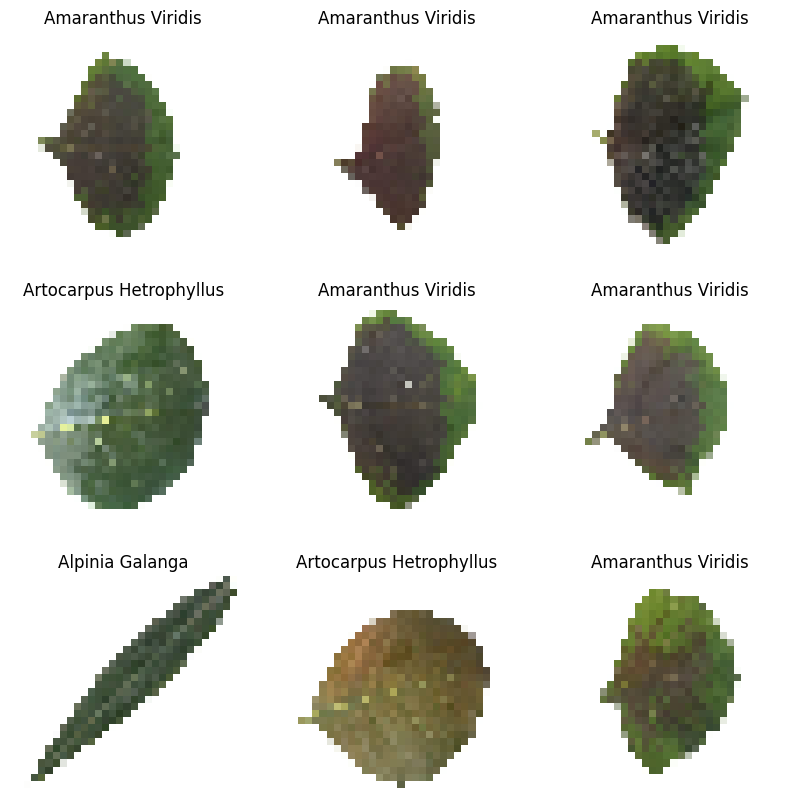

In [ ]:
class_name=['Alpinia Galanga','Amaranthus Viridis','Artocarpus Hetrophyllus']
plt.figure(figsize=(10,10))
for images,labels in train_ds.take(1):
  for i  in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_name[labels[i]])
    plt.axis("off")

In [ ]:
model=tf.keras.Sequential(

    [
        tf.keras.layers.Rescaling(1./255),
        tf.keras.layers.Conv2D(32,3,activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(32,3,activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(32,3,activation="relu"),
        tf.keras.layers.MaxPooling2D(),


        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128,activation="relu"),
        tf.keras.layers.Dense(3)
    ]
)

In [ ]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [ ]:
model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)

Epoch 1/20
6/6 [==============================] - 11s 2s/step - loss: 1.0786 - accuracy: 0.4257 - val_loss: 0.9739 - val_accuracy: 0.4545
Epoch 2/20
6/6 [==============================] - 1s 73ms/step - loss: 0.9207 - accuracy: 0.4950 - val_loss: 0.8851 - val_accuracy: 0.4545
Epoch 3/20
6/6 [==============================] - 1s 74ms/step - loss: 0.8054 - accuracy: 0.7030 - val_loss: 0.7295 - val_accuracy: 0.7273
Epoch 4/20
6/6 [==============================] - 1s 72ms/step - loss: 0.6740 - accuracy: 0.8119 - val_loss: 0.5777 - val_accuracy: 0.9091
Epoch 5/20
6/6 [==============================] - 1s 71ms/step - loss: 0.4770 - accuracy: 0.8317 - val_loss: 0.3612 - val_accuracy: 0.8909
Epoch 6/20
6/6 [==============================] - 1s 72ms/step - loss: 0.2733 - accuracy: 0.9406 - val_loss: 0.1611 - val_accuracy: 1.0000
Epoch 7/20
6/6 [==============================] - 1s 131ms/step - loss: 0.1183 - accuracy: 1.0000 - val_loss: 0.0611 - val_accuracy: 1.0000
Epoch 8/20
6/6 [===========

In [ ]:
model.evaluate(test_ds)

4/4 [==============================] - 10s 7ms/step - loss: 0.4009 - accuracy: 0.9028


[0.4009450376033783, 0.9027777910232544]

In [ ]:
import numpy

plt.figure(figsize=(10,10))
for images,labels in test_ds.take(1):
  classifications=model(images)
  print(classifications)

tf.Tensor(
[[-6.749972    5.0864797   2.0233095 ]
 [-7.36767    -0.12448013  7.0894437 ]
 [-5.0190125   3.7570894   0.8192284 ]
 [ 6.4734745  -9.678354   -3.130458  ]
 [-0.8630695  -6.1710176   2.5492404 ]
 [-7.4849653   8.258427    1.2831324 ]
 [-6.449408    8.4506445  -0.3339971 ]
 [-6.2736483   9.015327   -0.8066217 ]
 [-6.587555   -0.86983645  6.617064  ]
 [-2.5852108  -5.310756    4.860817  ]
 [-5.656873    6.927264   -0.25680348]
 [-5.404096    8.311351   -1.5974594 ]
 [ 6.6743984  -8.439383   -3.8339462 ]
 [-4.8020673   2.688456    1.3496708 ]
 [-7.1020947   7.7276974   0.7809899 ]
 [-3.124587   -4.152505    4.583792  ]
 [-5.524989    7.5889397  -1.320929  ]
 [-4.8530173   7.2837276  -1.7536598 ]
 [-7.567507    0.29167676  6.583829  ]
 [-7.8702164   8.755169    1.1799693 ]], shape=(20, 3), dtype=float32)


<Figure size 1000x1000 with 0 Axes>

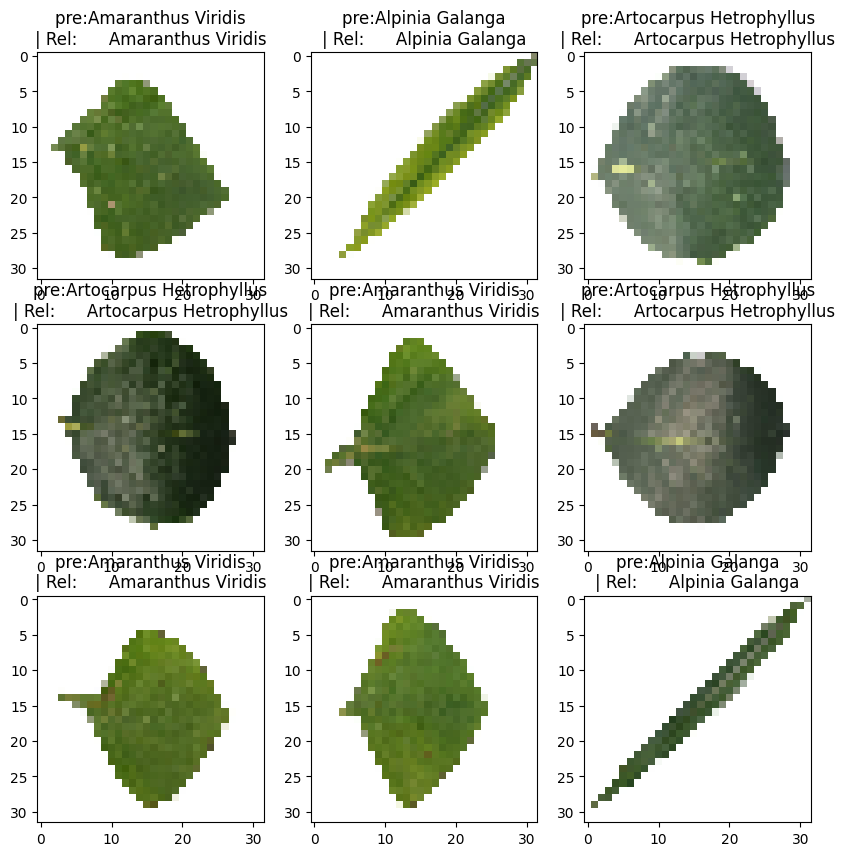

In [ ]:
import numpy

plt.figure(figsize=(10,10))
for images,labels in test_ds.take(1):
  classifications=model(images)
  # print(classifications)

  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index=numpy.argmax(classifications[i])
    plt.title("pre:"+class_name[index]+"\n| Rel:      "+class_name[labels[i]])

In [ ]:
converter=tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model=converter.convert()
with open("model.tflite",'wb') as f:
  f.write(tflite_model)